In [1]:
import numpy as np
import scipy.ndimage as simg
import scipy.signal as ssig
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2

In [2]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = (7,7)

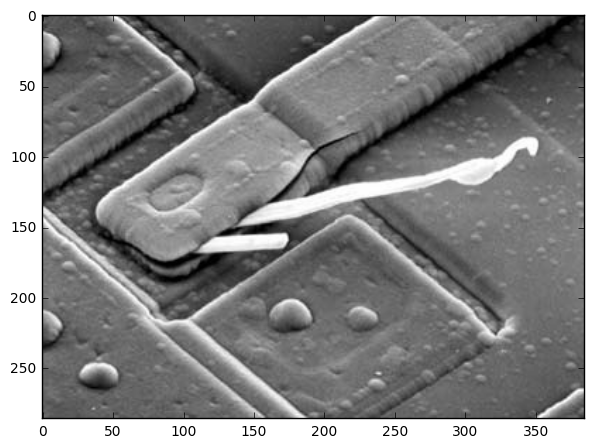

In [3]:
img = cv2.imread('sem_ic.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')
plt.show()

In [17]:
def final(img, fil):
    img_filtered = cv2.filter2D(img, -1, fil)
    
    fft_original = np.fft.fft2(img)
    # shifting zero frequency component to center of spectrum
    fft_original = np.fft.fftshift(fft_original)
    mag_img = 20*np.log(abs(fft_original))
    phase_img = np.angle(fft_original, deg=True)
    
    fft_filtered = np.fft.fft2(img_filtered)
    # shifting zero frequency component to center of spectrum
    fft_filtered = np.fft.fftshift(fft_filtered)
    mag_fil = 20*np.log(abs(fft_filtered))
    phase_fil = np.angle(fft_filtered, deg=True)
    
    plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(322),plt.imshow(img_filtered, cmap='gray'),plt.title('Filtered')
    plt.xticks([]), plt.yticks([])
    plt.subplot(323), plt.imshow(mag_img, cmap='gray'), plt.title('Magnitude Response, Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(324), plt.imshow(mag_fil, cmap='gray'), plt.title('Magnitude Response, Filtered')
    plt.xticks([]), plt.yticks([])
    plt.subplot(325), plt.imshow(phase_img, cmap='gray'), plt.title('Phase Response, Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(326), plt.imshow(phase_fil, cmap='gray'), plt.title('Phase Response, Filtered')
    plt.xticks([]), plt.yticks([])
    plt.show()

### Identity

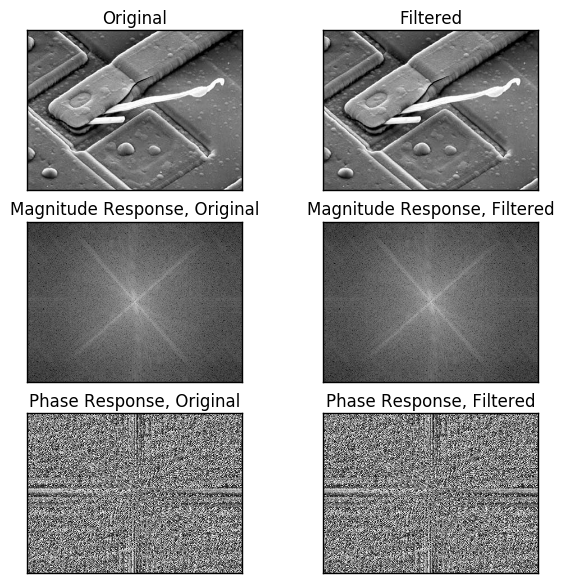

In [18]:
identity = np.array([(0,0,0),(0,1,0),(0,0,0)])
final(img_gray, identity)

### Averaging Filter

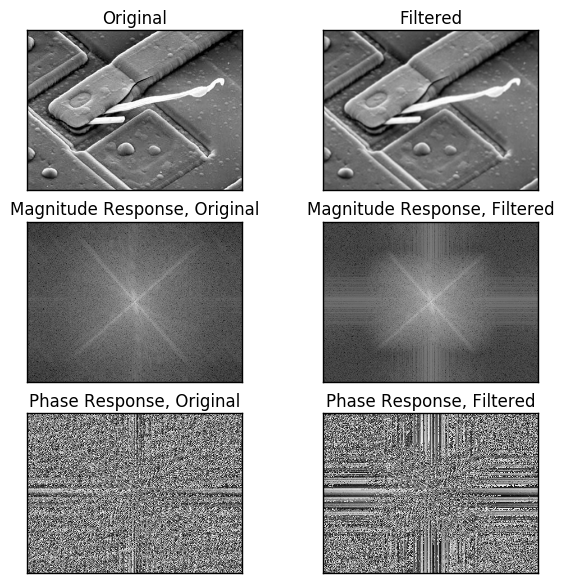

In [19]:
avg = np.array([(1,1,1),(1,1,1),(1,1,1)], dtype = float)/9
final(img_gray, avg)

### Sharpening Filter

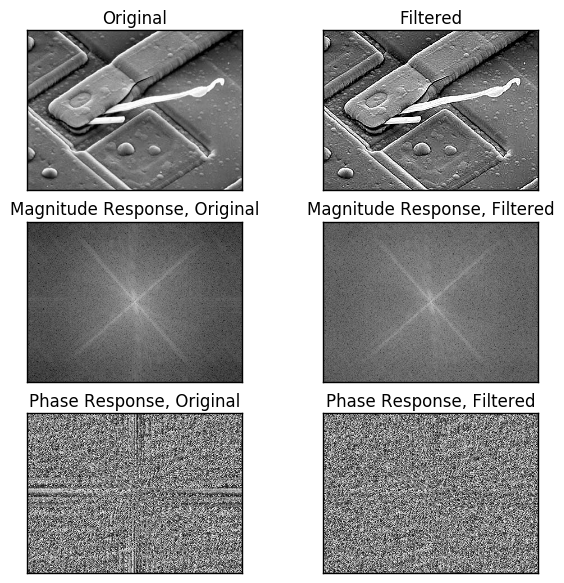

In [20]:
sharp = np.array([(0, -1, 0), (-1,5,-1), (0, -1, 0)])
final(img_gray, sharp)

### Gaussian Filter

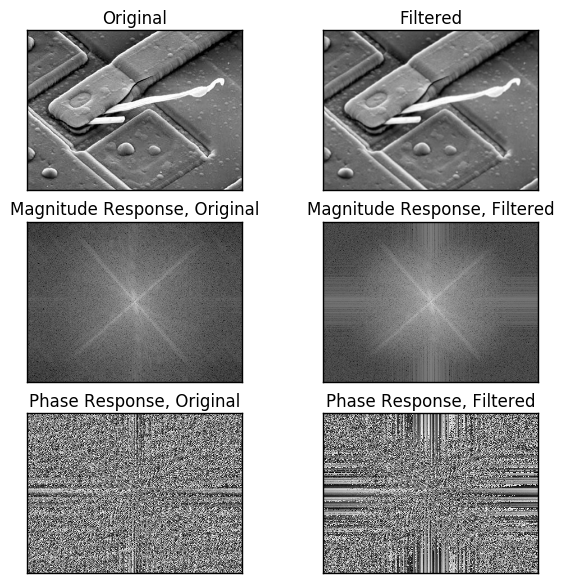

In [21]:
gaussian = np.array([(1,2,1),(2,4,2),(1,2,1)], dtype=float)/16
final(img_gray, gaussian)

### Sobel X
**For Derivative Calculation in X direction**

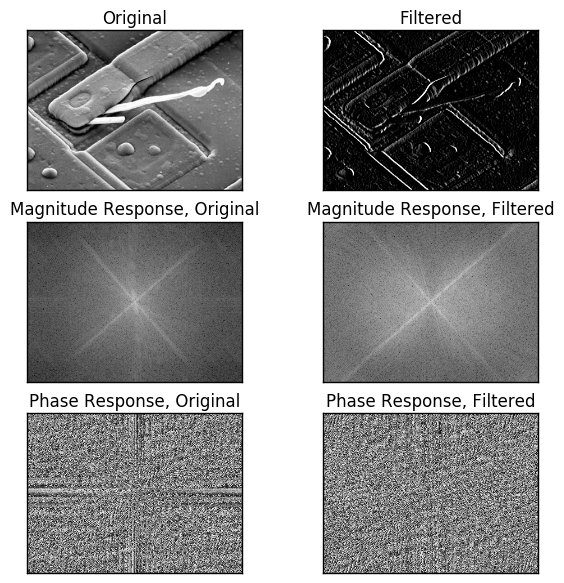

In [22]:
sobelX = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)])
final(img_gray, sobelX)

### Sobel Y
**For Derivative Calculation in Y direction**

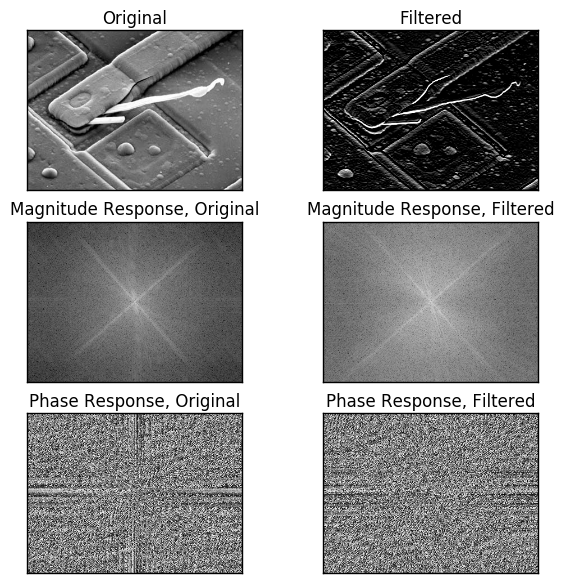

In [23]:
sobelY = np.array([(1,2,1),(0,0,0),(-1,-2,-1)])
final(img_gray, sobelY)

### Positive Laplacian Kernel
** Used to find the Outward Edges in an image ** 

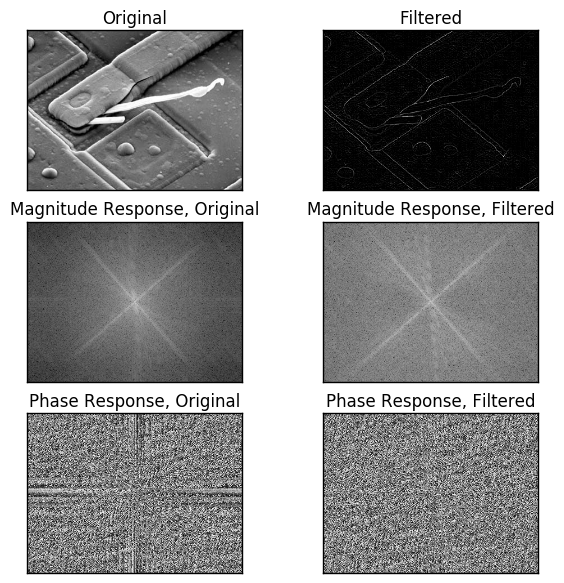

In [24]:
lap_pos = np.array([(0,1,0),(1,-4,1),(0,1,0)])
final(img_gray, lap_pos)

### Negative Laplacian Kernel
** Used to find the Inward Edges in an image **

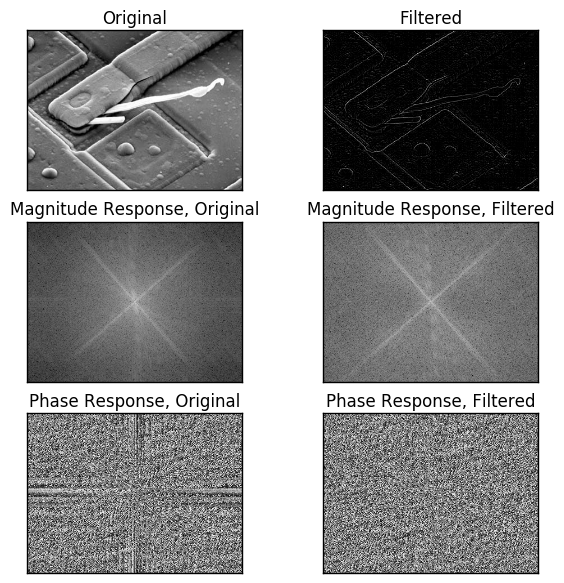

In [25]:
lap_neg = np.array([(0,-1,0), (-1,4,-1), (0,-1,0)])
final(img_gray, lap_neg)

### Median Filter

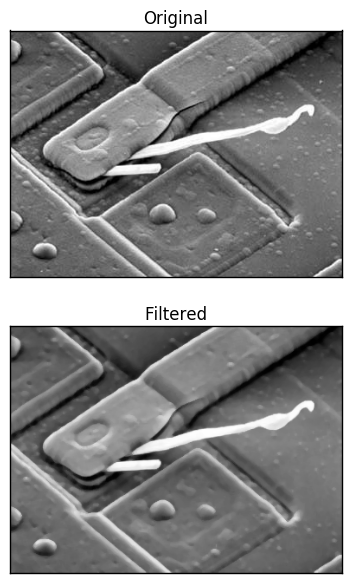

In [26]:
img_median = cv2.medianBlur(img_gray,5)
plt.subplot(211),plt.imshow(img_gray, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(img_median, cmap='gray'),plt.title('Filtered')
plt.xticks([]), plt.yticks([])
plt.show()

# Applications

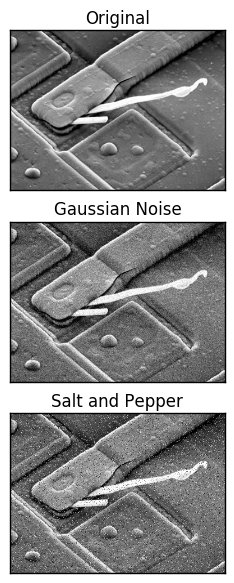

In [27]:
original = cv2.imread('sem_ic.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
gaussian_noise = cv2.imread('Gaussian.png')
gaussian_noise = cv2.cvtColor(gaussian_noise, cv2.COLOR_BGR2GRAY)
sandp_noise = cv2.imread('Salt and Pepper.png')
sandp_noise = cv2.cvtColor(sandp_noise, cv2.COLOR_BGR2GRAY)

plt.subplot(311),plt.imshow(original, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(gaussian_noise, cmap='gray'),plt.title('Gaussian Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(sandp_noise, cmap='gray'),plt.title('Salt and Pepper')
plt.xticks([]), plt.yticks([])
plt.show()

### Salt and Pepper Noise Removal
Salt and pepper noise manifests itself as sparsely occurring white and black pixels. Linear filters like **mean** or **gaussian** filters are ineffective at removing this noise. <br />
Non-linear filters like median filters are extremely efficient at removing salt and pepper noise as can be seen in the following example.

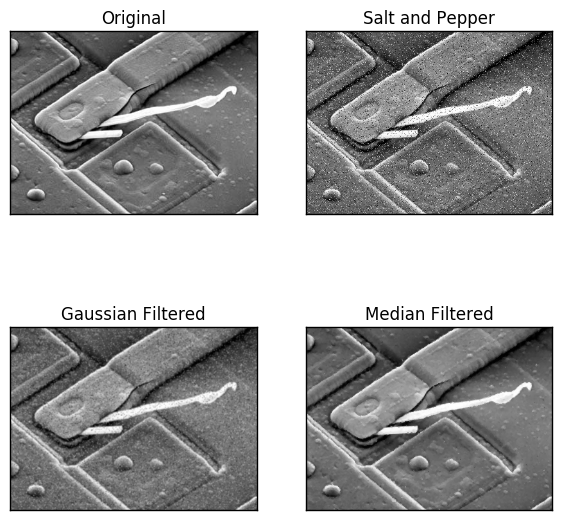

In [28]:
gaussian_filtered = cv2.filter2D(sandp_noise,-1, gaussian)
median_filtered = cv2.medianBlur(sandp_noise, 3)

plt.subplot(221),plt.imshow(original, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sandp_noise, cmap='gray'),plt.title('Salt and Pepper')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gaussian_filtered, cmap='gray'),plt.title('Gaussian Filtered')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median_filtered, cmap='gray'),plt.title('Median Filtered')
plt.xticks([]), plt.yticks([])
plt.show()

### Laplacian of Gaussian Filtering
Most edge detecting algorithms like laplacian operator are very sensitive to noise. Gaussian filter blurs the noisy image and reduces noise. This improves results of the edge detection algorithm. <br />
In the following example, we apply a negative laplacian on a noisy image. Then, we apply laplacian on a gaussian filtered image and observe the results.

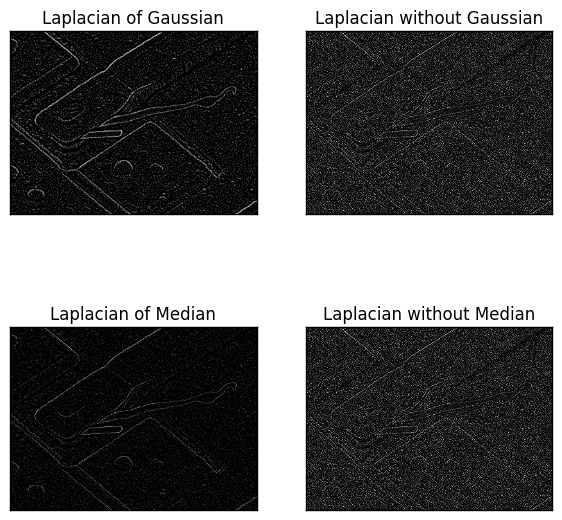

In [32]:
gaussian_filtered = cv2.filter2D(gaussian_noise, -1,gaussian)
log = cv2.filter2D(gaussian_filtered, -1,lap_neg)
lwg = cv2.filter2D(gaussian_noise, -1,lap_neg)

median_filtered = cv2.medianBlur(gaussian_noise, 3)
lom = cv2.filter2D(median_filtered, -1,lap_neg)
lwm = cv2.filter2D(gaussian_noise, -1,lap_neg)

plt.subplot(221),plt.imshow(log, cmap='gray'),plt.title('Laplacian of Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(lwg, cmap='gray'),plt.title('Laplacian without Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(lom, cmap='gray'),plt.title('Laplacian of Median')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(lwm, cmap='gray'),plt.title('Laplacian without Median')
plt.xticks([]), plt.yticks([])
plt.show()